<a href="https://colab.research.google.com/github/dralvima/IITmethods/blob/main/ChatGPT4Worm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Read in data from: https://www.wormwideweb.org/dataset.html

In [ ]:
from google.colab import files
import json

# Step 1: Upload the JSON file (to start, let's use: 2023-01-23-21)
uploaded = files.upload()

# Step 2: Read the JSON file
file_name = next(iter(uploaded))
rawdata = json.loads(uploaded[file_name].decode("utf-8"))

# Step 3: Access the z-scored ratiometric neural data
data = {}
data['neurodata'] = rawdata.get('trace_array', None)
data['neurolabels'] = rawdata.get('labeled', None)

# Check if both 'neurodata' and 'neurolabels' were found and print a message
if data['neurodata'] is not None and data['neurolabels'] is not None:
    print("Neural data detected")
else:
    print("Neural data not found in the JSON file.")

Saving 2023-01-23-21.json to 2023-01-23-21.json
Neural data detected


throw out what we do not need and save new variable

In [ ]:
# Step 4: Save the 'data' variable to a JSON file
with open('data.json', 'w') as file:
    json.dump(data, file)

print("Data saved to 'data.json'")
del rawdata

Data saved to 'data.json'


# 2. Select 3 Neurons:
see
https://funconn.princeton.edu/
for functional connectivity
and
https://www.wormatlas.org/neurons/Individual%20Neurons/Neuronframeset.html
for details
[one Hebbian synapse for this dataset is: AVEL -> AIBL <- RIAR]

Enter the labels of three neurons. Available neuron labels:
AVEL, RMEL, AWAR, URYDL, I2L, SAAVL, I1R, RMDR, IL1DL, URYDR, SIBVL, RMER, SMDVR, RIAR, SAADL, M3R, RICR, AIM?, ADAL, RMDVR, AIBL, SMBV?, RMF?, OLQVL, RMEV, OLLL, RMDL, RMDDL, NSMR, AIZL, AVDR, URXR, AIZR, AVAL, IL2DL, RID, AQR, CEPDL, AVAR, RIBL, I2R, AVDL, AVJR, IL2L, NSML, AINR, RIMR, M4, IL1V?, AIYR, CEPVL, IL2R, AWCR, AWBR, OLQDR, IL1L, URYVR, MCR, AUAL, AWAL, RMDVL, RMGL, M3L, IL2VL, FLPL, AVER, RIVR, I3, AIBR, RMDDR, I1L, URXL, CEPVR, IL1V?, IL1DR, OLQDL, IL2VR, SMBV?, RMED, URBL, ASGL, ASHL, M5, AVJL, SMDVL, OLLR, RIVL, IL1R, MI, ADEL, URYVL, AWCL, AINL, MCL, AIYL, AVHL, ASGR, CEPDR, M1, RMF?, RICL, URBR
Enter neuron label 1: AVEL
Enter neuron label 2: AIBL
Enter neuron label 3: AIM?


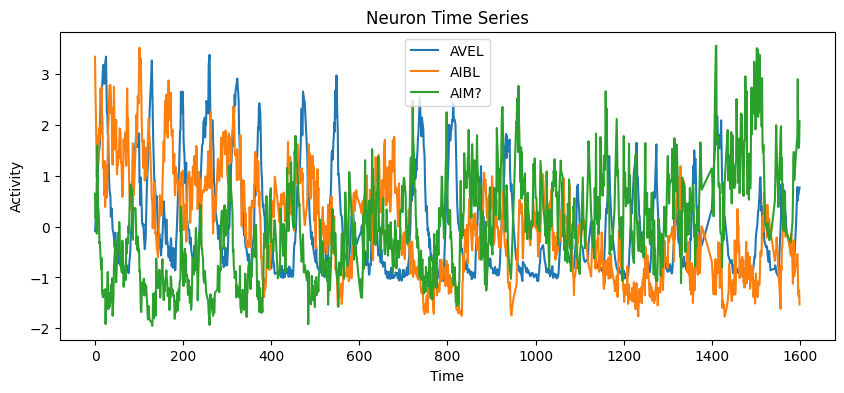

In [ ]:
import matplotlib.pyplot as plt

# Extract neuron labels and time series data
neuron_labels = {key: value['label'] for key, value in data['neurolabels'].items()}
neuron_data = data['neurodata']

# Function to plot the selected neurons' time series
def plot_neuron_data(selected_neurons):
    plt.figure(figsize=(10, 4))
    for neuron in selected_neurons:
        neuron_index = list(neuron_labels.values()).index(neuron)
        plt.plot(neuron_data[neuron_index], label=neuron)
    plt.xlabel('Time')
    plt.ylabel('Activity')
    plt.title('Neuron Time Series')
    plt.legend()
    plt.show()

# Use input fields in Colab to select neurons
print("Enter the labels of three neurons. Available neuron labels:")
print(', '.join(neuron_labels.values()))  # Display all neuron labels

selected_neurons = []
for i in range(3):
    neuron = input(f"Enter neuron label {i+1}: ")
    if neuron in neuron_labels.values():
        selected_neurons.append(neuron)
    else:
        print(f"Neuron {neuron} not found. Please try again.")

# Plot the time series for the selected neurons
if len(selected_neurons) == 3:
    plot_neuron_data(selected_neurons)
else:
    print("Insufficient neurons selected for plotting.")


# 3. Plot cross-correlograms

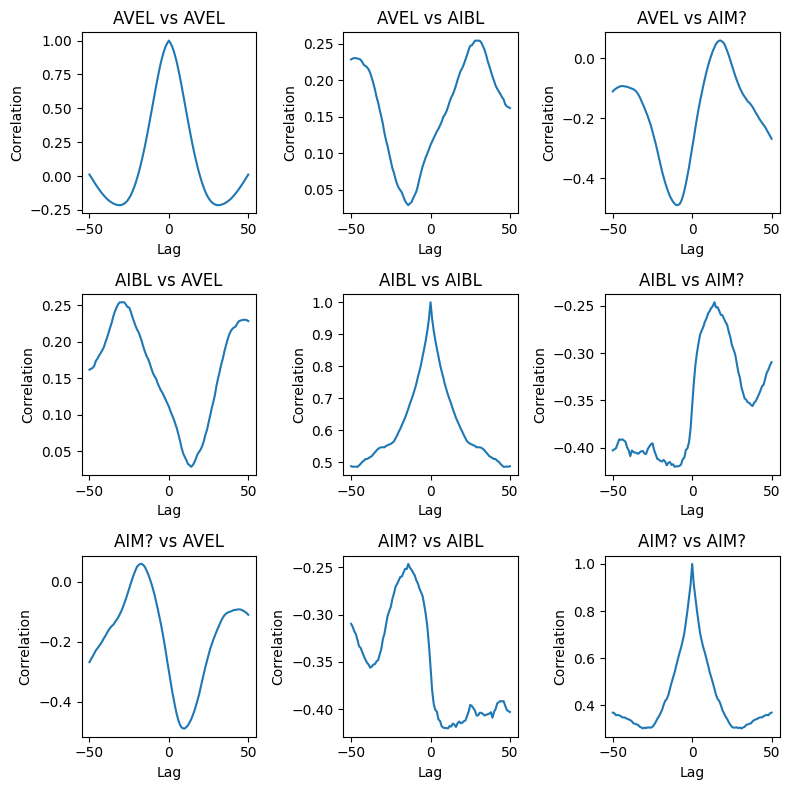

In [ ]:
import numpy as np

def compute_cross_correlation(signal1, signal2, max_lag):
    """
    Compute the cross-correlation between two signals with a specified maximum lag.
    The function returns the cross-correlation and the corresponding lags.
    """
    correlation = np.correlate(signal1 - np.mean(signal1), signal2 - np.mean(signal2), mode='full')
    correlation /= np.std(signal1) * np.std(signal2) * len(signal1)
    lags = np.arange(-max_lag, max_lag + 1)
    return correlation[len(correlation)//2 - max_lag: len(correlation)//2 + max_lag + 1], lags

# Define the maximum lag for the cross-correlation
max_lag = 50  # This value might need adjustment based on the time scale of your data

# Create a grid for the subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

# For each pair of neurons, compute and plot the cross-correlation
for i, neuron1 in enumerate(selected_neurons):
    for j, neuron2 in enumerate(selected_neurons):
        ax = axes[i, j]
        # Find indices of the neurons
        neuron_index1 = list(neuron_labels.values()).index(neuron1)
        neuron_index2 = list(neuron_labels.values()).index(neuron2)

        # Compute cross-correlation
        correlation, lags = compute_cross_correlation(neuron_data[neuron_index1], neuron_data[neuron_index2], max_lag)

        # Plot the cross-correlation
        ax.plot(lags, correlation)
        ax.set_title(f'{neuron1} vs {neuron2}')
        ax.set_xlabel('Lag')
        ax.set_ylabel('Correlation')

plt.tight_layout()
plt.show()